## Loading packages

In [1]:
from genepy.utils import helper as h

# to comment in your case
from taigapy import TaigaClient
tc = TaigaClient()

from celligner import Celligner
import pandas as pd
# to comment in your case
from depmapomics import tracker as track
#autoreload
%load_ext autoreload
%autoreload 2
#output
from bokeh.plotting import output_notebook
output_notebook()

from celligner.params import TISSUE_COLOR

/home/jeremie/celligner/celligner/mnnpy/mnnpy/utils.py:14: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "l2_norm" failed type inference due to: No implementation of function Function(<function norm at 0x7fa2040d2d90>) found for signature:
 
 >>> norm(x=array(float32, 2d, A), axis=Literal[int](1))
 
There are 2 candidate implementations:
  - Of which 2 did not match due to:
  Overload in function 'norm_impl': File: numba/np/linalg.py: Line 2352.
    With argument(s): '(x=array(float32, 2d, A), axis=int64)':
   Rejected as the implementation raised a specific error:
     TypeError: norm_impl() got an unexpected keyword argument 'x'
  raised from /home/jeremie/miniconda3/lib/python3.7/site-packages/numba/core/typing/templates.py:722

During: resolving callee type: Function(<function norm at 0x7fa2040d2d90>)
During: typing of call at /home/jeremie/celligner/celligner/mnnpy/mnnpy/utils.py (16)


File "celligner/mnnpy/mnnpy/utils.py", li

Loading BokehJS ...

## Loading expression files

In [ ]:
# load from taiga public (figshare link)
# load internal expression,
# latest version can be found at https://depmap.org/portal/download/
# can also be loaded like so pd.read_csv('gs://ccle_default_params/celligner_ex/CCLE_expression.csv.gz', index_col=0)
CCLE_expression = tc.get(name='internal-21q3-fe4c',
                         file='CCLE_expression_full')  


# load  TCGA expression
# this dataset was generated from  ,using this script: 
# caan be found here: pd.read_csv('gs://ccle_default_params/celligner_ex/TCGA_expression.csv.gz', index_col=0)
TCGA_expression = tc.get(name='celligner-input-9827',
                         file='tumor_expression')

In [ ]:
# subset gene names to ensembl ids only
CCLE_expression = CCLE_expression[CCLE_expression.columns[:-92]]
CCLE_expression.columns = list(map(lambda x: x.split(
    ' (')[1][:-1] if ' (' in x else x, CCLE_expression.columns))

common = set(CCLE_expression.columns).intersection(
    set(TCGA_expression.columns))
CCLE_expression = CCLE_expression[list(common)]
TCGA_expression = TCGA_expression[list(common)]

## Managing annotations

In [ ]:
# loading annotations
CCLE_annotation = track.getTracker() # the function uses pygsheets to load this: REFSHEET_URL=https://docs.google.com/spreadsheets/d/1Pgb5fIClGnErEqzxpU7qqX6ULpGTDjvzWwDN8XUJKIY
# Sheets.from_files(MY_ID, MYSTORAGE_ID).get(REFSHEET_URL).sheets[0].to_frame(index_col=0)
# you can also get it from pd.read_csv('gs://ccle_default_params/celligner_ex/CCLE_annotation.csv.gz', index_col=0)


# can be loaded from 
# pd.read_csv('gs://ccle_default_params/celligner_ex/TCGA_annotation.csv.gz', index_col=0)
TCGA_annotation = tc.get(name='celligner-input-9827',
                         file='tumor_annotations') # generated manually 

In [ ]:
# transforming annotations
CCLE_annotation = CCLE_annotation.drop_duplicates('arxspan_id').set_index("arxspan_id")
CCLE_annotation = CCLE_annotation.loc[CCLE_expression.index, ["origin", 'subtype']].rename(columns={"origin": "tissue_type", "subtype": 'disease_type'})
CCLE_annotation["cell_type"] = "CCLE cell line"

TCGA_annotation = TCGA_annotation.set_index("sampleID").loc[TCGA_expression.index,["lineage",
"subtype"]].rename(columns={"lineage":"tissue_type", "subtype": 'disease_type'})
TCGA_annotation['cell_type'] = "TCGA tumor"

In [13]:
rename = {np.nan: "unknown", "adrenal_cortex": "adrenal", "colorectal": "colon", 'thymus': 'thyroid', 'meninges':"central_nervous_system", None: "unknown", 'brain': "central_nervous_system"}

In [ ]:
# some name are not consistent between the two datasets
CCLE_annotation = CCLE_annotation.replace({"tissue_type": rename})
TCGA_annotation = TCGA_annotation.replace({"tissue_type": rename})

## Fitting celliner with the CCLE dataset 

In [ ]:
# issues when rerunning celligner

In [ ]:
my_alligner = Celligner(make_plots=True, priotize_fit=True)
my_alligner.fit(CCLE_expression, CCLE_annotation)

In [43]:
my_alligner.method = "mnn"
my_alligner.priotize_fit=True
my_alligner.mnn_kwargs = {'k1': 5, 'k2': 50,}
_ = my_alligner.transform(_rerun=False)

/home/jeremie/miniconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)


reducing dimensionality...


doing differential expression analysis on the clusters..
regressing out the cPCA components..
doing the MNN analysis using scanPy MNN...
Performing cosine normalization...


/home/jeremie/celligner/celligner/mnnpy/mnnpy/utils.py:14: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "l2_norm" failed type inference due to: No implementation of function Function(<function norm at 0x7fa2040d2d90>) found for signature:
 
 >>> norm(x=array(float32, 2d, A), axis=Literal[int](1))
 
There are 2 candidate implementations:
    - Of which 2 did not match due to:
    Overload in function 'norm_impl': File: numba/np/linalg.py: Line 2352.
      With argument(s): '(x=array(float32, 2d, A), axis=int64)':
     Rejected as the implementation raised a specific error:
       TypeError: norm_impl() got an unexpected keyword argument 'x'
  raised from /home/jeremie/miniconda3/lib/python3.7/site-packages/numba/core/typing/templates.py:722

During: resolving callee type: Function(<function norm at 0x7fa2040d2d90>)
During: typing of call at /home/jeremie/celligner/celligner/mnnpy/mnnpy/utils.py (16)


File "celligner/mnnpy/mnnpy/uti

Starting MNN correct iteration. Reference batch: 0
Step 1 of 1: processing batch 1
  Looking for MNNs...


/home/jeremie/celligner/celligner/mnnpy/mnnpy/mnn.py:108: DeprecationWarning: The n_jobs argument has been renamed "workers". The old name "n_jobs" will stop working in SciPy 1.8.0.
  k_index_1 = cKDTree(data1).query(x=data2, k=k1, n_jobs=n_jobs)[1]
/home/jeremie/celligner/celligner/mnnpy/mnnpy/mnn.py:109: DeprecationWarning: The n_jobs argument has been renamed "workers". The old name "n_jobs" will stop working in SciPy 1.8.0.
  k_index_2 = cKDTree(data2).query(x=data1, k=k2, n_jobs=n_jobs)[1]


found 14019 mnns..
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
MNN correction complete. Gathering output...
done
reducing dimensionality...
making plot...


In [ ]:
# using the marioni mnn method
my_alligner.method = "mnn_marioni"
my_alligner.priotize_fit=True
my_alligner.mnn_kwargs = {'k1': 5, 'k2': 50, 'cosine_norm': True, "fk":5}
_ = my_alligner.transform(_rerun=False)

In [7]:
my_alligner.umap_kwargs

{'n_neighbors': 15, 'min_dist': 0.2, 'metric': 'cosine', 'n_components': 2}

In [8]:
my_alligner.plot(color_column="tissue_type", colortable=TISSUE_COLOR, umap_kwargs={'n_neighbors': 10,'min_dist': 0.3, 'metric': 'euclidean'})

reducing dimensionality...
making plot...


Figure(id='1762', ...)

In [ ]:
my_alligner.plot(rerun=False)

In [ ]:
# running with regular mnn
my_alligner.method = "mnn"
_ = my_alligner.transform(TCGA_expression, TCGA_annotation)

In [4]:
my_alligner.save('../temp/demo/')

## adding other datasets to celligner

In [2]:
# you can load the dataset from gcp: (you can do so by hand or by installing gsutil)
# (make sure you have the right folder and then do:
# ! gsutil cp gs://celligner/model.pkl ../temp/demo/
my_alligner = Celligner()
my_alligner.load('../temp/demo/')

fetching gene names from biomart cache
using only usefull genes


In [9]:
# met500 
met500_ann = tc.get(name='met500-fc3c', file='met500_ann')
met500_meta = tc.get(name='met500-fc3c', file='met500_meta')
met500_TPM = tc.get(name='met500-fc3c', file='met500_TPM') #20,979x868 matrix

#Novartis_PDX
Novartis_PDX_ann = tc.get(name='pdx-data-3d29', file='Novartis_PDX_ann')
Novartis_PDX_TPM = tc.get(name='pdx-data-3d29', file='Novartis_PDX_TPM').T # 38,087x445

#pediatric_PDX
pediatric_PDX_ann = tc.get(name='pdx-data-3d29', file='pediatric_PDX_ann')
pediatric_PDX_TPM = tc.get(name='pdx-data-3d29', file='pediatric_PDX_TPM') #80,000x250

No dataset version provided. Using version 1.
No dataset version provided. Using version 1.
No dataset version provided. Using version 1.
No dataset version provided. Using version 2.
No dataset version provided. Using version 2.
No dataset version provided. Using version 2.
No dataset version provided. Using version 2.


### Managing annotations

In [11]:
met500_meta

Sample_id sample_type sample_source dataset  \
0     ES_5001-capt-SI_5013-C0LAMACXX       tumor       ES_5001    mctp   
1     ES_5004-capt-SI_5834-C19KEACXX       tumor       ES_5004    mctp   
2     ES_5004-poly-SI_5767-C19KEACXX       tumor       ES_5004    mctp   
3     ES_5005-capt-SI_5505-D130HACXX       tumor       ES_5005    mctp   
4     ES_5005-poly-SI_5486-D12YGACXX       tumor       ES_5005    mctp   
..                               ...         ...           ...     ...   
863  TP_2123-poly-SI_11689-C7G60ANXX       tumor       TP_2123    mctp   
864  TP_2130-capt-SI_11905-C7FMDANXX       tumor       TP_2130    mctp   
865  TP_2131-capt-SI_11906-C7F4VANXX       tumor       TP_2131    mctp   
866  TP_2141-capt-SI_12056-H53C5ADXX       tumor       TP_2141    mctp   
867  TP_2156-capt-SI_12477-C7G91ANXX       tumor       TP_2156    mctp   

       tissue cohort                           run.id   idx   test    tc  \
0      breast   BRCA   ES_5001-capt-SI_5013-C0LAMACXX   461  False  0.93   
1       colon   COLO   ES_5004-capt-SI_5834-C19KEACXX   468  False  0.47   
2       colon   COLO   ES_5004-poly-SI_5767-C19KEACXX   469  False  0.47   
3       other   MISC   ES_5005-capt-SI_5505-D130HACXX   470  False  0.41   
4       other   MISC   ES_5005-poly-SI_5486-D12YGACXX   471  False  0.41   
..        ...    ...                              ...   ...    ...   ...   
863     brain   MISC  TP_2123-poly-SI_11689-C7G60ANXX  4154  False  0.52   
864      None   HNSC  TP_2130-capt-SI_11905-C7FMDANXX  4160   True  0.46   
865   bladder   BLCA  TP_2131-capt-SI_11906-C7F4VANXX  4161  False  0.43   
866    breast   BRCA  TP_2141-capt-SI_12056-H53C5ADXX  4169  False  0.67   
867  prostate   PRAD  TP_2156-capt-SI_12477-C7G91ANXX  4180  False  0.78   

    biopsy_tissue primary_site  
0           brain       breast  
1     soft_tissue        colon  
2     soft_tissue        colon  
3          cervix        other  
4          cervix        other  
..            ...          ...  
863         brain        brain  
864          oral         None  
865         liver      bladder  
866         liver       breast  
867         liver     prostate  

[868 rows x 12 columns]

In [14]:
met500_meta["primary_site"] = met500_ann['primary_site'].values
met500_ann = met500_meta.rename(columns={"Sample_id": 'sample_id', 'tissue': 'tissue_type', 'primary_site': "disease_type", "sample_type": "cell_type"}).set_index('sample_id', drop=True)[["tissue_type","disease_type","cell_type"]].replace({"tissue_type":rename, "cell_type": {"tumor": "met500 tumor"}})

In [15]:
pediatric_PDX_ann = pediatric_PDX_ann.rename(columns={"sampleID": 'sample_id', 'lineage': 'tissue_type', 'subtype': "disease_type", "type": "cell_type"}).set_index('sample_id', drop=True)[['cell_type', 'disease_type', 'tissue_type']].replace({"tissue_type":rename})

In [16]:
Novartis_PDX_ann = Novartis_PDX_ann.rename(columns={"sampleID": 'sample_id', 'lineage': 'tissue_type', 'subtype': "disease_type", "type": "cell_type"}).set_index('sample_id', drop=True)[['cell_type', 'disease_type', 'tissue_type']].replace({"tissue_type":rename})

<AxesSubplot:>

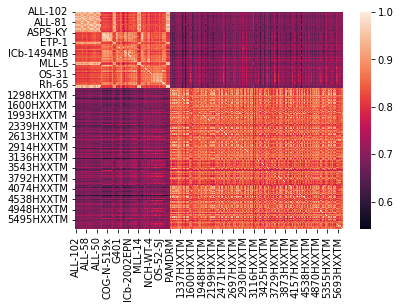

In [17]:
# Looking at dataset similarity
import seaborn as sns
sns.heatmap(pd.concat([pediatric_PDX_TPM.loc[:,set(pediatric_PDX_TPM.columns) & set(Novartis_PDX_TPM.columns)], Novartis_PDX_TPM.loc[:,set(pediatric_PDX_TPM.columns) & set(Novartis_PDX_TPM.columns)]]).T.corr())

In [18]:
Novartis_PDX_TPM = Novartis_PDX_TPM.loc[:,set(Novartis_PDX_TPM)& set(pediatric_PDX_TPM)]
pediatric_PDX_TPM = pediatric_PDX_TPM.loc[:,set(Novartis_PDX_TPM)& set(pediatric_PDX_TPM)]

In [19]:
pediatric_PDX_ann['cell_type'] = "ped PDX"

In [20]:
Novartis_PDX_ann = Novartis_PDX_ann.loc[Novartis_PDX_TPM.index]
pediatric_PDX_ann = pediatric_PDX_ann.loc[pediatric_PDX_TPM.index]

In [ ]:
# if you want to align to both CCLE and TCGA, you can ask celligner to consider the two (fit + _pre-transformed_ transform datasets) as a fit dataset by calling:
# my_alligner.putAllToFit()

# you can add your dataset as a dataset to be aligned to, by puting it in fit:
# my_alligner.addToFit(yourdataset).transform()
# /!\ need to already have a transform dataset (if you loaded the example model, this is TCGA)

# you can add your dataset as one to align, by putting it in transform:
# my_alligner.addToTransform(yourdataset)
# /!\ need to already have a fit dataset (if you loaded the example model, this is CCLE)

# if your dataset is small enough it might actually not work well to put it in transform it seems!
# if your dataset is small and similar enough, you can add the parameter dotransform=False (or dofit=False) so that it doesn't fully retransforms or refit but uses cached computation instead.
my_alligner.priotize_fit=False
my_alligner.putAllToFit(redo_diff=False)
_ = my_alligner.transform(met500_TPM, met500_ann, recompute_contamination=False)

In [ ]:
my_alligner.putAllToFit(redo_diff=False)

In [ ]:
_= my_alligner.transform(pd.concat([Novartis_PDX_TPM, pediatric_PDX_TPM]), pd.concat([Novartis_PDX_ann, pediatric_PDX_ann]), recompute_contamination=False)

In [ ]:
from celligner.params import TISSUE_COLOR

In [ ]:
my_alligner.plot(color_column="tissue_type", colortable=TISSUE_COLOR)

In [80]:
my_alligner.save('../temp/multidataset/')

## comparison and QC

In [38]:
KNNofCCLE = my_alligner.getKNN(ofcell="cancer cell line", incell="tumor sample", k=5)

In [50]:
simiscore = my_alligner.makeSimiScore(ofcell="cancer cell line", on="tissue_type")

group adrenal has less than 3 datapoint and should be merged or removed to get better results
we have an original overall silhouette score of -0.002895016088714352 for this cell type and annotation


### with scRNAseq methods

In [55]:
# installing necessary packages

#https://github.com/theislab/kBET
#! R -e "devtools::install_github('theislab/kBET')"

# https://github.com/theislab/scib
#! pip install git+https://github.com/theislab/scib.git -y

  Cloning https://github.com/theislab/scib.git to /tmp/pip-req-build-ese4qyqz
  Running command git clone -q https://github.com/theislab/scib.git /tmp/pip-req-build-ese4qyqz
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 8.8MB 619kB/s eta 0:00:01
     |████████████████████████████████| 20.1MB 58.3MB/s eta 0:00:01


  Stored in directory: /tmp/pip-ephem-wheel-cache-gt2722zj/wheels/cc/39/5c/b66c2b3e26bd2127f98dab16f72b61067e5b8cbc9262a5a10d
Successfully built scib
ERROR: celligner 0.9.3 requires contrastive>=1.1, which is not installed.
ERROR: tensorflow 2.6.0 has requirement h5py~=3.1.0, but you'll have h5py 2.10.0 which is incompatible.
ERROR: tensorflow 2.6.0 has requirement numpy~=1.19.2, but you'll have numpy 1.18.1 which is incompatible.
ERROR: tensorflow 2.6.0 has requirement wheel~=0.35, but you'll have wheel 0.33.4 which is incompatible.
ERROR: broad-genepy 1.1.3 has requirement gseapy==0.9.18, but you'll have gseapy 0.10.5 which is incompatible.
  Found existing installation: numpy 1.20.0
    Uninstalling numpy-1.20.0:
      Successfully uninstalled numpy-1.20.0


In [3]:
import scib
from anndata import AnnData

In [44]:
my_alligner.fit_annotations.replace({'tissue_type': {
'engineered_kidney': "kidney",
'engineered_central_nervous_system': "central_nervous_system",
'engineered_ovary': "ovary",
'engineered_prostate': "prostate",
'engineered_lung': "lung",
'engineered_blood': "blood",
'engineered_breast': "breast",
    }}, inplace=True)

my_alligner.transform_annotations.replace({'tissue_type': {
'engineered_kidney': "kidney",
'engineered_central_nervous_system': "central_nervous_system",
'engineered_ovary': "ovary",
'engineered_prostate': "prostate",
'engineered_lung': "lung",
'engineered_blood': "blood",
'engineered_breast': "breast",
    }}, inplace=True)

/home/jeremie/miniconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
adata = AnnData(*my_alligner.returnAgg(uncorrected=True))
adata_int = AnnData(*my_alligner.returnAgg(uncorrected=False))

adata.obs = adata.obs.astype('category')
adata_int.obs = adata_int.obs.astype('category')

scib.pp.reduce_data(adata, overwrite_hvg=False, umap=False)
scib.pp.reduce_data(adata_int, overwrite_hvg=False, umap=False)

/home/jeremie/miniconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PCA
Nearest Neigbours
PCA
Nearest Neigbours


#### regularr mnn version

In [46]:
res = scib.me.metrics(adata, adata_int, batch_key="cell_type", label_key="tissue_type",
                        hvg_score_=True,
                        cluster_key='cluster',
                        ari_=True,
                        nmi_=True,
                        silhouette_=True,
                        pcr_=True,
                        isolated_labels_f1_=True,
                        graph_conn_=True,
                        kBET_=True,
                        lisi_graph_=True,
                        ilisi_=True,
                        clisi_=True,
)
res

/home/jeremie/miniconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NMI...
ARI...
Silhouette score...
PC regression...


/home/jeremie/miniconda3/lib/python3.7/site-packages/scib/metrics/pcr.py:61: RuntimeWarning: invalid value encountered in double_scalars
  score = (pcr_before - pcr_after) / pcr_before


Isolated labels F1...
Graph connectivity...
kBET...


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)


Adding diffusion to step 4
Adding diffusion to step 5


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)


Adding diffusion to step 4


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next

Adding diffusion to step 4
Adding diffusion to step 5


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next

Adding diffusion to step 4
Adding diffusion to step 5


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)


Adding diffusion to step 4
Adding diffusion to step 5


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)


Adding diffusion to step 4


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next

fibroblast consists of a single batch or is too small. Skip.
Adding diffusion to step 4
Adding diffusion to step 5


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)


Adding diffusion to step 4


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)


Adding diffusion to step 4
Adding diffusion to step 5


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)


Adding diffusion to step 4


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)


Adding diffusion to step 4


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next

Adding diffusion to step 4


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)


Adding diffusion to step 4


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next

plasma_cell consists of a single batch or is too small. Skip.
embryo consists of a single batch or is too small. Skip.


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)


engineered consists of a single batch or is too small. Skip.


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)


nasopharynx consists of a single batch or is too small. Skip.
nerve consists of a single batch or is too small. Skip.
teratoma consists of a single batch or is too small. Skip.
germ_cell consists of a single batch or is too small. Skip.
endocrine consists of a single batch or is too small. Skip.
pineal consists of a single batch or is too small. Skip.
cLISI score...
/tmp/lisi_j413_z58/input.mtx /tmp/lisi_j413_z58/
132 has not enough neighbors.
145 has not enough neighbors.
1247 has not enough neighbors.
1248 has not enough neighbors.
1335 has not enough neighbors.
333 has not enough neighbors.
342 has not enough neighbors.
412 has not enough neighbors.
466 has not enough neighbors.
536 has not enough neighbors.
628 has not enough neighbors.
690 has not enough neighbors.
697 has not enough neighbors.
766 has not enough neighbors.
953 has not enough neighbors.
1019 has not enough neighbors.
1055 has not enough neighbors.
iLISI score...
/tmp/lisi_4u5yvtlm/input.mtx /tmp/lisi_4u5yvtlm/
126

0
NMI_cluster/label          0.744102
ARI_cluster/label          0.548334
ASW_label                  0.104280
ASW_label/batch            0.140044
PCR_batch                       NaN
cell_cycle_conservation         NaN
isolated_label_F1          0.217250
isolated_label_silhouette       NaN
graph_conn                 0.877459
kBET                       0.339061
iLISI                      0.000000
cLISI                      0.940979
hvg_overlap                0.507000
trajectory                      NaN

#### marioni_mnn version

In [33]:
res = scib.me.metrics(adata, adata_int, batch_key="cell_type", label_key="tissue_type",
                        hvg_score_=True,
                        cluster_key='cluster',
                        ari_=True,
                        nmi_=True,
                        silhouette_=True,
                        pcr_=True,
                        isolated_labels_f1_=True,
                        graph_conn_=True,
                        kBET_=True,
                        lisi_graph_=True,
                        ilisi_=True,
                        clisi_=True,
)
res

NMI...
ARI...
Silhouette score...
PC regression...


/home/jeremie/miniconda3/lib/python3.7/site-packages/scib/metrics/pcr.py:61: RuntimeWarning: divide by zero encountered in double_scalars
  score = (pcr_before - pcr_after) / pcr_before


Variance contribution increased after integration!
Setting PCR comparison score to 0.
Isolated labels F1...
Graph connectivity...
kBET...
Adding diffusion to step 4


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)


Adding diffusion to step 4


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)


Adding diffusion to step 4


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)


Adding diffusion to step 4


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)


Adding diffusion to step 4
Adding diffusion to step 5


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)


Adding diffusion to step 4
Adding diffusion to step 5


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next

Adding diffusion to step 4


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)


Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)


Adding diffusion to step 4
Adding diffusion to step 5


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)


Adding diffusion to step 4
Adding diffusion to step 5


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next

fibroblast consists of a single batch or is too small. Skip.
Adding diffusion to step 4
Adding diffusion to step 5


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)


Adding diffusion to step 4
Adding diffusion to step 5


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)


Adding diffusion to step 4


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)


Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6
Adding diffusion to step 7
Adding diffusion to step 8


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next

Adding diffusion to step 4
Adding diffusion to step 5


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)


Adding diffusion to step 4
Adding diffusion to step 5


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next

plasma_cell consists of a single batch or is too small. Skip.
embryo consists of a single batch or is too small. Skip.


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)


engineered consists of a single batch or is too small. Skip.


/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:264: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)
/home/jeremie/miniconda3/lib/python3.7/site-packages/rpy2/robjects/numpy2ri.py:198: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  category=DeprecationWarning)


nasopharynx consists of a single batch or is too small. Skip.
nerve consists of a single batch or is too small. Skip.
teratoma consists of a single batch or is too small. Skip.
germ_cell consists of a single batch or is too small. Skip.
endocrine consists of a single batch or is too small. Skip.
pineal consists of a single batch or is too small. Skip.
cLISI score...
/tmp/lisi_65gyrgyz/input.mtx /tmp/lisi_65gyrgyz/
iLISI score...
/tmp/lisi_wsi7mbsf/input.mtx /tmp/lisi_wsi7mbsf/


0
NMI_cluster/label          0.753381
ARI_cluster/label          0.532176
ASW_label                  0.553297
ASW_label/batch            0.747647
PCR_batch                  0.000000
cell_cycle_conservation         NaN
isolated_label_F1          0.211750
isolated_label_silhouette       NaN
graph_conn                 0.864709
kBET                       0.477357
iLISI                      0.021938
cLISI                      0.969527
hvg_overlap                0.516000
trajectory                      NaN

- [NMI_cluster/label](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html) BAD 0 - 1 GOOD
- [ARI_cluster/label](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html) BAD 0 - 1 GOOD
- [ASW_label](https://github.com/theislab/scib/blob/main/scib/metrics/silhouette.py): also see [isolated_label_F1](https://github.com/theislab/scib/blob/main/scib/metrics/isolated_labels.py#L19) BAD -1 - 0 - 1 GOOD
- [ASW_label/batch](https://github.com/theislab/scib/blob/main/scib/metrics/silhouette.py) (Batch removal) BAD -1 - 0 - 1 GOOD
- [PCR_batch](https://github.com/theislab/scib/blob/main/scib/metrics/pcr.py) (Batch removal) NOTHING 0 - 1 GOOD
- [isolated_label_F1](https://github.com/theislab/scib/blob/main/scib/metrics/isolated_labels.py#L19) BAD 0 - 1 GOOD
- hvg_overlap: Highly variable gene conservation between the two datasets BAD 0 - 1 GOOD
- [graph_conn](https://github.com/theislab/scib/blob/main/scib/metrics/graph_connectivity.py#L8) (Batch removal)
- [kBET](https://github.com/theislab/kBET) (Batch removal) BAD 0 - 1 GOOD
![Screenshot%202021-10-29%20at%2010.53.01.png](docs/Screenshot%202021-10-29%20at%2010.53.01.png)
- i[LISI](https://github.com/immunogenomics/LISI) (Batch removal) BAD 1 - >1 GOOD 
- c[LISI](https://github.com/immunogenomics/LISI) BAD <1 - GOOD 1 - >1 BAD
![Screenshot%202021-10-29%20at%2010.51.53.png](docs/Screenshot%202021-10-29%20at%2010.51.53.png)
